# ================================
# SVM with Python Tutorial and Examples
# ================================

# Preliminaries

This notebook command means that plots will be displayed in this notebook.

In [1]:
%matplotlib inline

## Modules to Import

"sklean" is scikit-learn, a popular Python module that implements many machine learning technqiues.  We import the part that implements support vector machines

In [2]:
from sklearn import svm

"numpy" is a module that helps do numerical calculations involving vectors and arrays very quickly

In [3]:
import numpy as np

"matplotlib" is a module for making plots.  The plotting part is in matplotlib.pyplot

In [4]:
import matplotlib.pyplot as plt

## Set Parameters for Making Plots

Change the string on the right hand side of the instruction below to the directory where you want to put the plot you make.  If you leave it as "", the plots will go in the current working directory.

In [5]:
plots_directory = ""

Change the size of plots to be twice as big as default values.  This helps make sure that the plots have high resolution and are large when displayed in this notebook.  Feel free to play with these values.

In [6]:
plt.rcParams['figure.figsize'] = [12., 8.]

Change the fontsize to be much larger (to go along with larger figure size.)  Feel free to play with this value.

In [7]:
plt.rcParams['font.size'] = 24.

# Exploring the linear SVM

## Using the SVM on Two Points

We start our exploration of SVMs, by analyzing a situation with only two points, which are on the x-axis and equidistant from the y-axis.  We give the first point the label "-1" and the second point the label "1". 

In [8]:
points = np.array([[-1., 0.],[1., 0.0]])
labels = np.array([-1,1])

We can plot the points in this scenario as follows.  The keyword "s" refers to the size of the points.  "c" refers to color.  A list of the color assignments of the points has been made, in what is hopefully a logical manner.

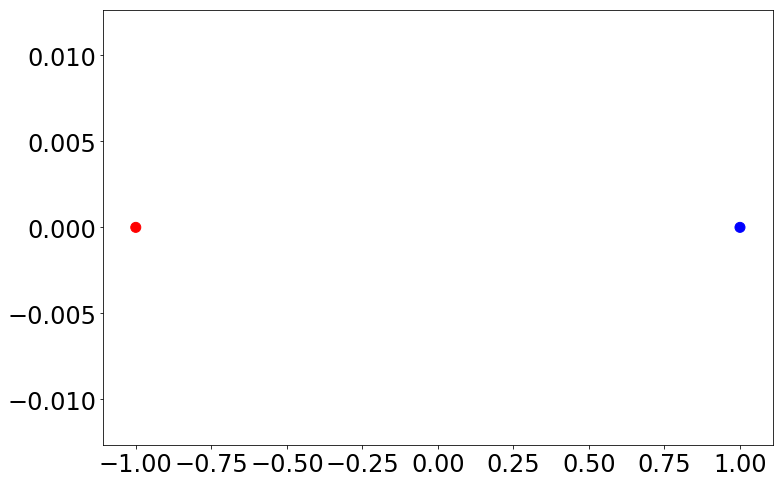

In [9]:
plt.scatter(points[:,0], points[:,1], s = 100, c = ["blue" if label == 1 else "red" for label in labels])

We now run the SVM on these points

In [10]:
our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)

We obtain the following support vectors (both points)

In [11]:
our_linear_svm.support_vectors_

array([[-1.,  0.],
       [ 1.,  0.]])

and the following coefficients for the support vectors

In [12]:
our_linear_svm.dual_coef_

array([[-0.5,  0.5]])

thus, the **w** vector has components given by

In [13]:
w = sum((our_linear_svm.dual_coef_ * our_linear_svm.support_vectors_.transpose()).transpose())
w

array([ 1.,  0.])

where the expression involves two transposes because of numpy's rules for "broadcasting".  If this does not make sense, a potentially clearer expression is

In [14]:
w = sum([alpha * v for alpha, v in zip(our_linear_svm.dual_coef_[0], our_linear_svm.support_vectors_)])
w

array([ 1.,  0.])

to find b, we use the fact that for all support vectors  
**w**$\cdot$**x**$_i$ + $b$ = $y_i$


Since our support vectors are

In [15]:
our_linear_svm.support_vectors_

array([[-1.,  0.],
       [ 1.,  0.]])

then from **w**$\cdot$**x**$_1$ = -1  
$y_1$ $=$ $-1$  
we get $b$ $=$ $0$  and
then from **w**$\cdot$**x**$_2$ = 1  
$y_2$ $=$ $1$  
we also get $b$ $=$ $0$.  This is the correct answer.

This division line corresponds to +1 when the x component is $> 0$ and $-1$ when the x component is $< 0$.  The decision function is simply the x coordinate of the points.  We test this using the method "decision_function" in our_linear_svm.

In [16]:
new_points = np.array([[2,3],[3,-2],[5,28],[-3,-4],[-7,11],[-4,0]])
our_linear_svm.decision_function(new_points)

array([ 2.,  3.,  5., -3., -7., -4.])

Our predicted values from new points are given by the method "predict" in our_linear_svm.

In [17]:
our_linear_svm.predict(new_points)

array([ 1,  1,  1, -1, -1, -1])

## Using the SVM on Three Points

We now explore a very simple situation in which not all of the points are support vectors

In [18]:
points = np.array([[-1,0],[1,0],[2,-4]])
labels = np.array([-1,1,1])

our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)

We note that we have the same support vectors with the same coefficients as in the two point case.

In [19]:
our_linear_svm.support_vectors_, our_linear_svm.dual_coef_[0]

(array([[-1.,  0.],
        [ 1.,  0.]]), array([-0.5,  0.5]))

## Random Points

We can generate uniformly distributed random points (where all coordinates take on values between 0 and 1) using numpy.random.random with the size parameter set as follows.

In [20]:
number_of_points     = 300
number_of_dimensions = 2

points = np.random.random(size = (number_of_points, number_of_dimensions))

We can use the numpy.where command to make a list of labels for the points.  Here the decision boundary is the line y = x.

In [21]:
labels = np.where(points[:,0] - points[:,1] > 0, 1, -1)

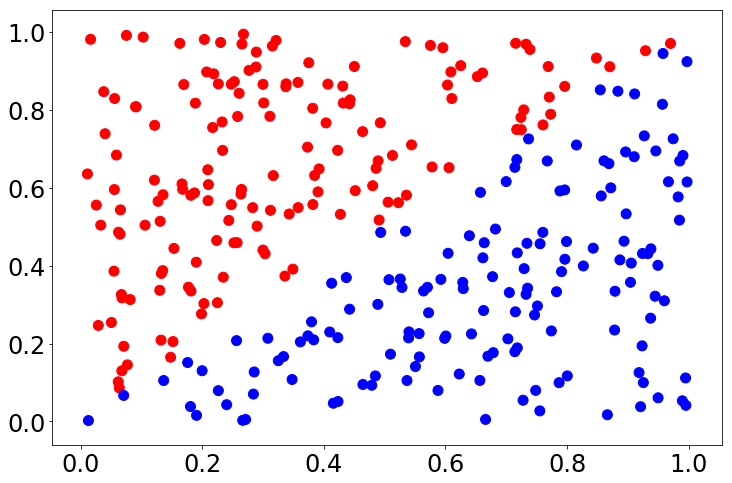

In [22]:
plt.scatter(points[:,0], points[:,1], s = 100, c = ["blue" if label == 1 else "red" for label in labels])

In this situation there are many more support vectors

In [23]:
our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)
our_linear_svm.support_vectors_

array([[ 0.38191054,  0.5571117 ],
       [ 0.52268204,  0.56182562],
       [ 0.29981808,  0.44018334],
       [ 0.72870936,  0.80013398],
       [ 0.30340527,  0.43064081],
       [ 0.22494743,  0.30500577],
       [ 0.48590111,  0.65000159],
       [ 0.60584749,  0.65170826],
       [ 0.06777998,  0.13019579],
       [ 0.39034851,  0.58960522],
       [ 0.92899393,  0.95201275],
       [ 0.87025542,  0.91091792],
       [ 0.77306783,  0.78888337],
       [ 0.50560994,  0.56312108],
       [ 0.1987711 ,  0.27625668],
       [ 0.5442024 ,  0.71031242],
       [ 0.35775762,  0.5492163 ],
       [ 0.18159515,  0.33506093],
       [ 0.06186142,  0.10184306],
       [ 0.34303423,  0.53275329],
       [ 0.77070995,  0.83297381],
       [ 0.2028014 ,  0.30267062],
       [ 0.34910244,  0.39122019],
       [ 0.13230151,  0.2089081 ],
       [ 0.51282077,  0.68321874],
       [ 0.06363176,  0.08617679],
       [ 0.07094881,  0.19313495],
       [ 0.53584077,  0.58113091],
       [ 0.15192699,

with non-trivial coefficients...

In [24]:
our_linear_svm.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.21784951,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.68607647, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

We calculate **w**

In [25]:
w = sum([alpha * v for alpha, v in zip(our_linear_svm.dual_coef_[0], our_linear_svm.support_vectors_)])
w

array([ 4.94080146, -5.03242965])

We can also get this directly from the coef_ method.

In [26]:
our_linear_svm.coef_

array([[ 4.94080146, -5.03242965]])

and now we calculate $b$

In [27]:
[(our_linear_svm.decision_function(np.array([sv]))-sum(w * sv), label) 
 for sv, label in zip(our_linear_svm.support_vectors_, labels)]

[(array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1),
 (array([ 0.03910768]), 1),
 (array([ 0.03910768]), -1)

or get it directly from "our_linear_svm"

In [28]:
our_linear_svm.intercept_

array([ 0.03910768])

This value of **w** is clearly not a unit vector, so we normalize it

In [29]:
w_norm = our_linear_svm.coef_[0]/np.sqrt(our_linear_svm.coef_[0,0]**2 + our_linear_svm.coef_[0,1]**2)
w_norm

array([ 0.70058073, -0.71357315])

the "right" answer for infinitely many points from this distribution is 

In [30]:
np.array([np.sqrt(0.5), -np.sqrt(0.5)])

array([ 0.70710678, -0.70710678])

and the "right" answer for infinitely many points from thist distribution is 0, so we see that there are some discrepancies with what we get with infinite data, even when we have 300 data points

## Torques

We generate 300,000 points with x in [-1,1] and y in [-1,1]

In [55]:
number_of_points     = 30000
number_of_dimensions = 2

points = 2. * np.random.random(size = (number_of_points, number_of_dimensions)) - 1

Plot of first 1000 points

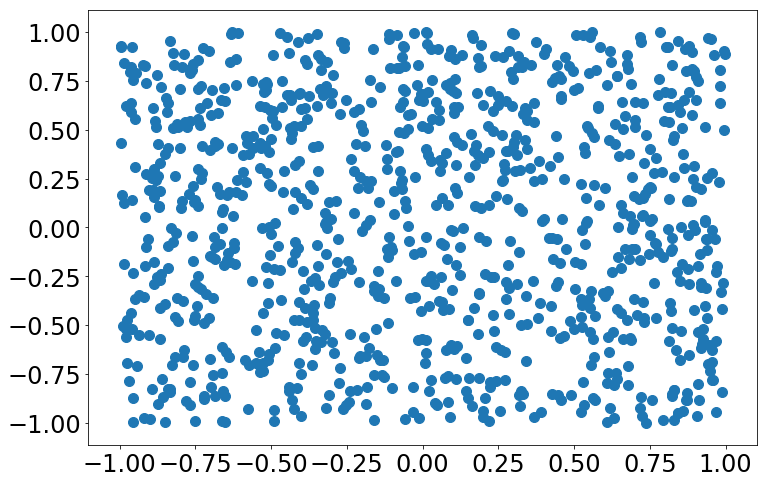

In [56]:
plt.scatter(points[:1000,0], points[:1000,1], s = 100)

We set points with positive x to have label 1, points with negative x to have label -1.

In [57]:
labels = np.where(points[:,0] > 0., 1, -1)

We run the SVM and get the **w** and b for the decision hyperplane

In [58]:
our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)

In [59]:
our_linear_svm.coef_

array([[  2.43586235e+01,  -2.09719407e-02]])

In [60]:
our_linear_svm.intercept_

array([ 0.00955317])

We confirm that the sum of the alpha_i (the dual coefficients) are 0.

In [61]:
sum(our_linear_svm.dual_coef_[0])

7.8825834748386114e-14

The cross product of **a** and **b** is $a_x b_y - a_y b_x$.  So the sum of the cross products of **w** and the **x**$_i$ is zero.

In [122]:
sum(our_linear_svm.dual_coef_[0] * (our_linear_svm.coef_[0,0] * our_linear_svm.support_vectors_[:,1] - 
                                our_linear_svm.coef_[0,1] * our_linear_svm.support_vectors_[:,0]))

-1.1546319456101628e-13

In both cases the answer may not exactly be zero, due to round-off error.

## XOR

We now see what a **linear** support vector machine does with the XOR situation.  We know that it won't work for the same reasons that it didn't work for the perceptron.

In [38]:
points = np.array([[-1,-1],[1,-1],[-1, 1],[1,1]])
labels = np.array([-1,1,1,-1])

our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)

Calculating **w**, we find

In [39]:
w = sum([alpha * v for alpha, v in zip(our_linear_svm.dual_coef_[0], our_linear_svm.support_vectors_)])
w

array([ 0.,  0.])

Since **w** $=$ $0$, we cannot satisfy  
**w**$\cdot$**x**$_i$ + $b$ = $y_i$  
unless all the $y_i$ are the same ($y_i = y$, in which case the predicition function is f(**x**) = y)